# KNN Regressor (Question 1)


 - Student Name: Akshay Sapra 
 - Stuident ID: 29858186
 
Programming Language used: R in Jupyter Notebook

Libraries Used: 
- ggplot2 - for data visualisation
- reshape2- to reshape the data

### Steps for the solution
<ol>
	<li>Load the Train and test dataset provided as part of the assignment specification</li>
    <li>Define KNN function that takes the training data and their labels (continuous values), the test
set, and the size of the neighborhood ($K$),</li>
	<li>Apply KNN where for some values of $K$ and report training and testing error</li>
	<li>Plot training and testing error versus $1/K$ where $K \in \{1,\cdots,20\}$</li>
</ol>

#### Task I

Implement the KNN regressor function: 
                
                knn(train.data, train.label, test.data, K=4)
which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (K). It should return the regressed values for the test data points. Note that, you need to use a distance function to choose the neighbors. The distance function used to measure the distance between a pair of data points is Euclidean distance function.


### Libraries Used

In [2]:
library(reshape2) # to reshape the data
library (ggplot2) # for data visualisation

### Load and Explore Data

In [5]:
# REading the data from csv 
Train= read.csv('Task1A_train.csv')
Test= read.csv('Task1A_test.csv')

In [6]:
# Checking first few rows 
head(Train)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


In [7]:
# Checking first few rows 
head (Test) 

x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [8]:
# Checking the dimensions of Train and Test data
dim (Train)
dim (Test) 

[1] 42  2

[1] 42  2

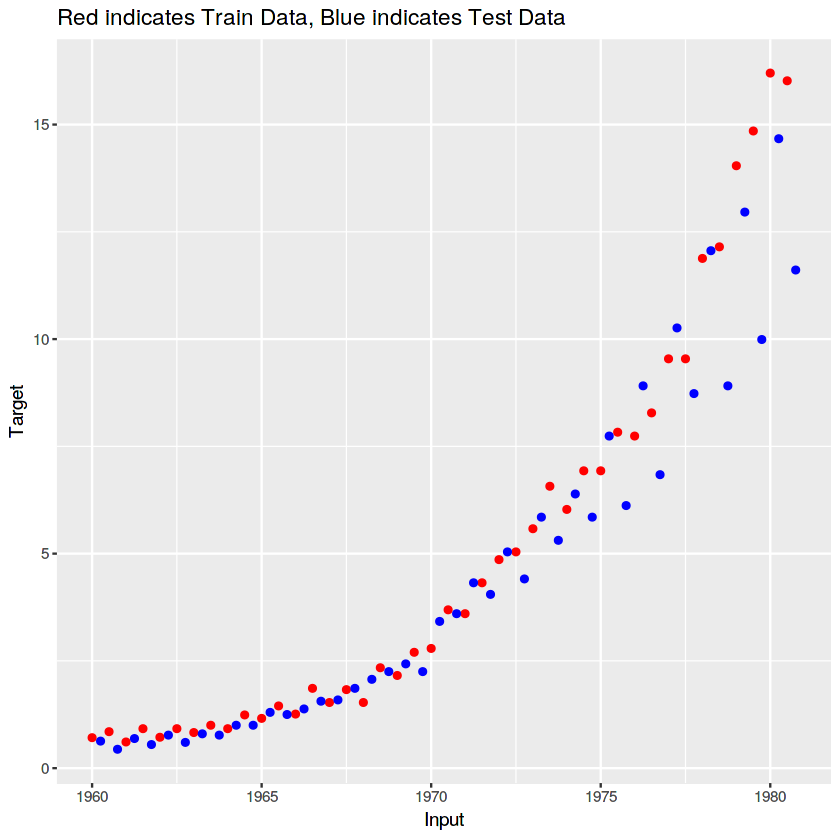

In [75]:
ggplot(data= Train,aes (x=x1,y=y) )+geom_point(color='Red') + scale_colour_manual(name ="Data", labels=c("Train", "Test"),values=c("Red","Blue"))  +labs (x= "Input", y ="Target") +ggtitle ("Red indicates Train Data, Blue indicates Test Data")+geom_point(data= Test,aes (x=x1,y=y),color='Blue')


In [67]:
#divinding train and test data into separate data and label columns 
train.data <- Train
train.label<-Train[,'y']
test.data<- Test
test.label<-Test[,'y']

### KNN Regressor

In [68]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=4, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i]<- (mean(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.label)
}

### Test for KNN

In [69]:
#Testing the method
knn(train.data, train.label, test.data, K=4)

[1]  0.7725  0.7725  0.7750  0.7925  0.8475  0.8675  0.9175  0.9975  1.0800
[10]  1.1925  1.2775  1.4325  1.5250  1.6200  1.6875  1.8075  1.9650  2.1825
[19]  2.4975  2.4975  3.1950  3.6000  4.1175  4.4550  4.9500  4.9500  5.8050
[28]  5.8050  6.6150  6.6150  7.3575  7.3575  8.3475  7.6950  9.8100  8.7750
[37] 11.9025  8.7750 13.2300 10.7775 15.2775 13.2300

### Task II

Plot the training and the testing errors versus 1/$K$ for K=1,..,20 in one plot,
using the **Task1A_train.csv** and **Task1A_test.csv** datasets provided for
this assignment. Save the plot in your Jupyter Notebook file for
Question 1. Report your chosen error function in your Jupyter Notebook
file.

* Root Mean Square Error is used in the solution as it is more sensitive to outliers and will make large error undesirable for this case. 
(Reference: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)

It's formula is given by $$ RMSE=\sqrt{\frac{1}{n}\sum_{t=1}^{n}e_t^2}  \\
$$

#### Error Calculation

In [71]:
# calculate the train and test RMSE rates for K in 1:20
# THIS MAY TAKE A FEW MINUTES TO COMPLETE!
miss <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    miss[k,'train'] <- sqrt(mean((knn(train.data, train.label, train.data, K=k) - train.label)^2))
    miss[k,'test'] <-  sqrt(mean((knn(train.data, train.label, test.data, K=k)  - test.label)^2))
}

#### Visualisation

In [76]:
# Finding the minimum x and y coordinates for train and test error 
x_tr_min=1/which.min(miss$train); y_tr_min=min(miss$train)
x_ts_min=1/which.min(miss$test); y_ts_min=min(miss$test)
# Reference: https://stat.ethz.ch/R-manual/R-devel/library/base/html/which.min.html

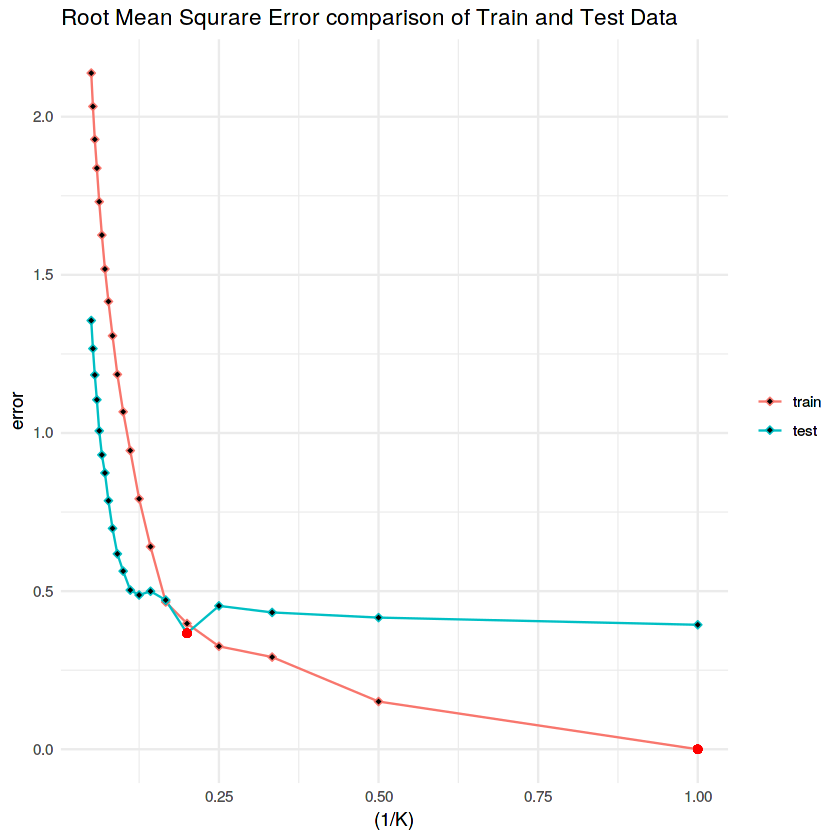

In [93]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=(1/K), y=error, color=type)) + geom_line() + geom_point(shape=23, fill='black')+
  scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
  ggtitle("Root Mean Squrare Error comparison of Train and Test Data")+  
  geom_point(aes(x=x_tr_min, y=y_tr_min), colour="red") +
  geom_point(aes(x=x_ts_min, y=y_ts_min), colour="red")


#### Task III

Report (in your Jupyter Notebook file) the optimum value for K in terms
of the testing error. Discuss the values of K corresponding to underfitting
and overfitting based on your plot in the previous part (Part II).

**Observations:**
- Training error is zero (minimum) for K=1 and there is difference in training and testing Error indicating there is **overfitting** for K=1.
- Testing Error is minimum for K=5 which indicates the biar-varience trade off point and is the most **optimal** K.
- Training and Testing Error starts increasing wiht increase in K (for K>5) which indicates **underfitting**.
